## 吴恩达机器学习习题三：逻辑回归（多分类）<br><br>
- 实现手写数字识别

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize

In [2]:
#读取数据数据可视化
data = sio.loadmat('ex3data1.mat')  #读取matlab文件，用sio.loadmat读取。data为字典
X1 = data['X']  #从字典data中取出特征集X,m=5000，n=400，n是特征（像素，20*20）
y1 = data['y']


#数据可视化
def plot_imagine(X):
    
    sample_index = np.random.choice(len(X),100)  #随机生成100个数，np.random.choice（范围，个数）
    imagines = X[sample_index,:]  #从X中选取100张图片（行数，列数）,imagines是一个（100,400）的矩阵
    fig,ax = plt.subplots(10,10,figsize=(8,8),sharex=True,sharey=True)  #生成一个10行10列的图
    for r in range(10):
        for c in range(10):
            ax[r,c].imshow(imagines[10*r+c].reshape(20,20).T,cmap='gray_r')  #imshow为画图，imagines[10*i+j]遍历imagines的每一行    plt.xticks([])  #消除x坐标轴的刻度
    plt.xticks([])
    plt.yticks([])
    plt.show()

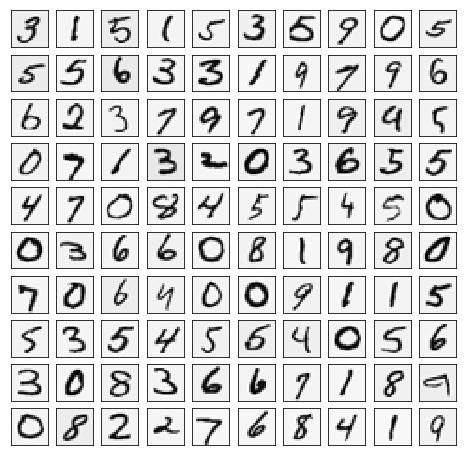

In [3]:
plot_imagine(X1)

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
#代价函数
def cost_function(theta,X,y,lamda):
    
    A = sigmoid(X@theta)
    first = y*np.log(A)
    second = (1-y)*np.log(1-A)
    reg = theta[1:]@theta[1:]*(lamda/(2*len(X)))
    return -np.sum(first+second)/len(X)+reg

In [6]:
#梯度向量
def gradient_reg(theta,X,y,lamda):
    
    reg = theta[1:]*(lamda/len(X))
    reg = np.insert(reg,0,values=0,axis=0)
    first = (X.T@(sigmoid(X@theta)-y))/len(X)
    return reg + first

In [7]:
#优化函数
def one_vs_all(X,y,lamda,k):  #k为分类器的个数，即有k种结果
    
    n = X.shape[1]  #n为矩阵X的列数
    theta_all = np.zeros((k,n))
    
    for i in range(1,k+1):  #对每一种结果优化其theta值
        theta1 = np.zeros((n,))
        result = minimize(fun=cost_function,
                         x0=theta1,
                         args=(X,y==i,lamda),
                         method='TNC',
                         jac=gradient_reg)
        theta_all[i-1:] = result.x  #更新每一行的theta_all的值，变成优化后的结果
    
    return theta_all

In [8]:
#正确率
def predict(X,theta_all):
    h = sigmoid(X@theta_all.T)  #X(5000,401),theta_all(10,401),h(5000,10)
    h_argmax = np.argmax(h,axis=1)+1  #找出每一行中最大数所在位置
    acc = np.mean(h_argmax==y)
    print(acc)

In [9]:
X = np.insert(X1,0,values=1,axis=1)
y = y1.flatten()  #将y变成（n,）
lamda = 1
k = 10
theta2 = one_vs_all(X,y,lamda,k)
predict(X,theta2)

0.9446
